# Regresyon Performansının Değerlendirilmesi

Sürekli bir niceliği tahmin ettiğimiz için regresyon performans ölçütleri, sınıflandırma ölçütlerinden farklıdır. 

Regresyon modelini değerlendirmek için kullanılan temel metrikler aşağıda sunulmuştur.

## 1) Ortalama Mutlak Hata (Mean Absolute Error - MAE)

Ortalama mutlak hata (MAE), modelin tahmin hatasını hesaplamak için kullanılan en yaygın ölçütlerden biridir. Tek bir veri satırının tahmin hatası:

***Tahmin Hatası = Gerçek Değer - Tahmin Edilen Değer***

Her veri satırı için tahmin hatalarını hesaplamamız, mutlak değerlerini almamız ve ardından tüm mutlak tahmin hatalarının ortalamasını bulmamız gerekiyor.

MAE aşağıdaki formülle hesaplanır:

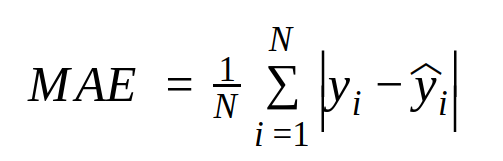

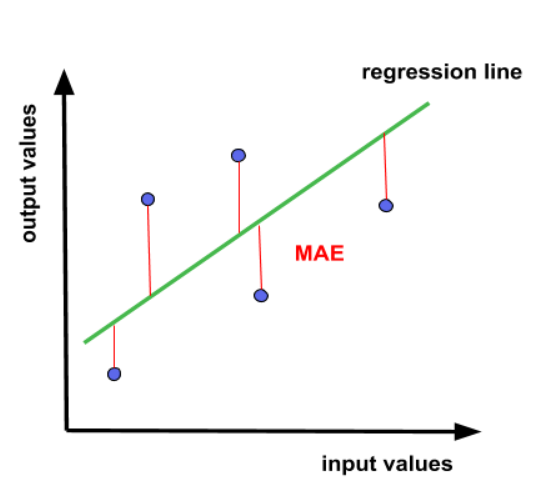

Yukarıdaki grafik, fark (residual) değerlerini temsil eder - tahmin edilen değerler (regresyon çizgisi) ve çıktı değerleri arasındaki farkları göstermektedir. MAE, farkların mutlak değerini kullanır, tek tek bütün fark değerlerini topladığımız için, her farkın toplam hataya doğrusal olarak katkısını belirtir. Bu nedenle, küçük MAE, modelin tahminde harika olduğunu öne sürer. Benzer şekilde, büyük bir MAE, modelinizin iyi genelleme yapmakta sorun yaşayabileceğini gösterir. MAE = 0, modelimizin mükemmel tahminler verdiği anlamına gelir, ancak bunun gerçek senaryolarda gerçekleşmesi olası değildir.

## 2) Ortalama Karesel Hata (Mean Squared Error - MSE)

Ortalama karesel hata (MSE), gerçek ve tahmin edilen değerler arasındaki ortalama kare farkını alır. Bu ölçüt, birçok regresyon problemi için yaygın olarak kullanılmaktadır.

MSE aşağıdaki formülle hesaplanır:

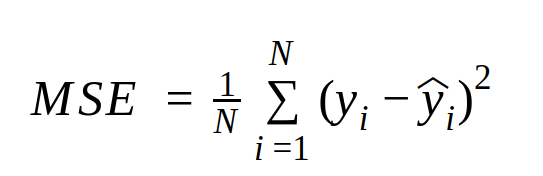

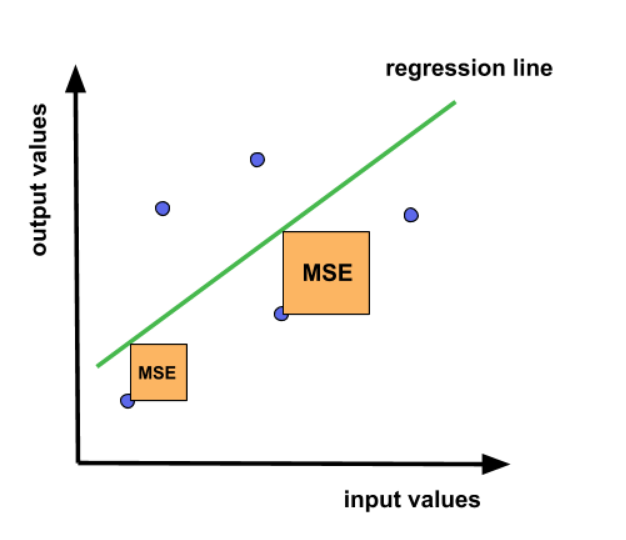

MSE neredeyse her zaman MAE'den daha büyük olacaktır çünkü MAE'de fark değerleri toplam hataya doğrusal olarak katkıda bulunurken, MSE'de hata her fark değeri ile ikinci dereceden katkı sağlamaktadır. Bu nedenle MSE, fazla fark değerlerini güçlü bir şekilde cezalandırdığı için modelin verilere ne ölçüde uyduğunu belirlemek için kullanılır.

## 3) R2 Skoru

R2 skoru, regresyon tahminlerinin gerçek veri noktalarına ne kadar iyi yaklaştığını belirler.

R2 skoru aşağıdaki formülle hesaplanır:

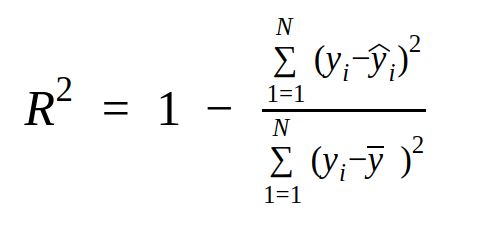

R2 skoru, 0'dan 1'e kadar değerler alabilir. 1 değeri, regresyon tahminlerinin verilere mükemmel şekilde uyduğunu gösterir.

## Örnek Uygulama 1

Basit Doğrusal Regresyon ünitesinde kullandığımız `bas_beyin.csv` dosyası üzerine tekrar çalışalım. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bas_beyin = pd.read_csv("bas_beyin.csv")
bas_beyin.head()

,Cinsiyet,Yas_Araligi,Bas_cevresi(cm^3),Beyin_agirligi(gr)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
X = bas_beyin['Bas_cevresi(cm^3)'].values  # Bağımsız Değişken
y= bas_beyin['Beyin_agirligi(gr)'].values  # Bağımlı Değişken

In [4]:
X = X.reshape((len(X),1))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [6]:
from sklearn.linear_model import LinearRegression
modelRegresyon = LinearRegression()
modelRegresyon.fit(X_train, y_train)

LinearRegression()

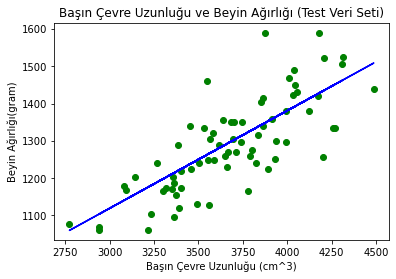

In [7]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, modelRegresyon.predict(X_test), color = 'blue')
plt.title('Başın Çevre Uzunluğu ve Beyin Ağırlığı (Test Veri Seti)')
plt.xlabel('Başın Çevre Uzunluğu (cm^3)')
plt.ylabel('Beyin Ağırlığı(gram)')
plt.show()

In [8]:
y_pred = modelRegresyon.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
print("R-Kare: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R-Kare:  0.6032549624752204
MAE:  62.45053697648635
MSE:  6312.680013262244


## Örnek Uygulama 2
Bir çalışma bölgesindeki Landsat uydu görüntüleri ile elde edilmiş Arazi Yüzeyi Sıcaklığı (LST) ve Bitki Örtüsü İndeksi (NDVI) değerleri arasında lineer bir ilişkinin olup olmadığı araştırılacaktır.

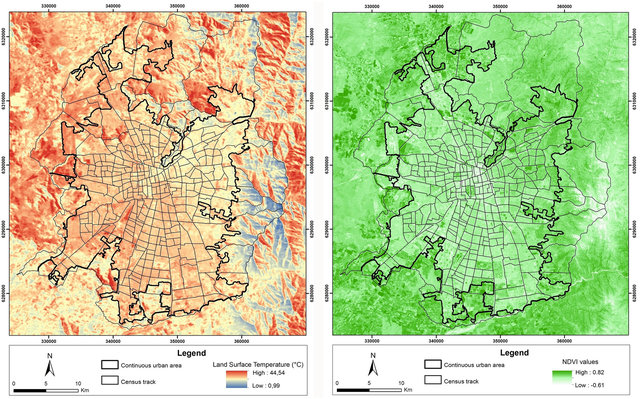

In [11]:
veriseti=pd.read_csv('ndvi_lst.csv')
veriseti.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


Bu verisetinin sadece NDVI ve LST sütunlarını kullanalım.

In [12]:
veriseti=pd.read_csv('ndvi_lst.csv', usecols=["NDVI","LST"])
veriseti.head()

,NDVI,LST
0,0.506782,14584.272727
1,0.522150,14655.833333
2,0.682284,14780.000000
3,0.120046,13298.500000
4,0.568734,14743.000000


In [13]:
veriseti.describe()

,NDVI,LST
count,1713.000000,1713.000000
mean,0.555665,14622.802073
std,0.092847,366.927861
min,0.030735,13137.000000
25%,0.501276,14406.000000
50%,0.565181,14645.750000
75%,0.620987,14881.300000
max,0.781723,15611.570513


In [14]:
X = veriseti['NDVI'].values  # Bağımsız Değişken
y = veriseti['LST'].values  # Bağımlı Değişken

In [15]:
X = X.reshape((len(X),1))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [17]:
from sklearn.linear_model import LinearRegression
modelReg = LinearRegression()
modelReg.fit(X_train, y_train)

LinearRegression()

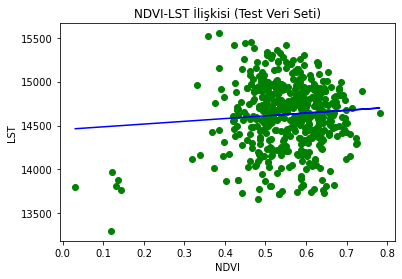

In [18]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, modelReg.predict(X_test), color = 'blue')
plt.title('NDVI-LST İlişkisi (Test Veri Seti)')
plt.xlabel('NDVI')
plt.ylabel('LST')
plt.show()

In [19]:
y_pred = modelReg.predict(X_test)

Model performansını denetleyelim.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
print("R-Kare: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R-Kare:  0.006899618024573728
MAE:  290.9720778470155
MSE:  137718.71763570915


Model performansımız oldukça düşük çıktı. Bu durum, veri setindeki NDVI ve LST değerlerinin arasında lineer bir ilişkinin olmadığı anlamına gelebilir. Dolayısıyla, ilerde göreceğimiz başka algoritmalarla bu ilişki çözümlenmeye çalışılabilir. 

Yine de, uydurulan eğriyi kullanarak NDVI değeri 0.555 olan herhangi bir pikselin kestirilen LST değerini bulalım.

In [22]:
modelReg.predict([[0.555]])

array([14628.24124437])

## Kendinizi Sınayınız

Prestijli bir dergi olan Remote Sensing of Environment'ta yayınlanan bir [çalışmanın](https://doi.org/10.1016/j.rse.2020.111677) açık erişimli veri setini kullanacağız. Bu veri setinde MODIS uydu verileri kullanılarak elde edilen kar örtüsü, su yüzeyleri, toprak, bitki örtüsü ile ilgili bazı ölçümler ve bitki örtüsü/kar örtüsü indeks değerleri bulunmaktadır. 
Veri setinde bulunan sütunların açıklamaları aşağıdaki gibidir. 

| Sütun İsmi     | Açıklama          | 
|--------------|----------------|
| `VGCF`    | Bitki örtüsü oranı: Bitki ile kaplı alan / Toplam alan    |
| ``SOILCF``    | 	Toprak örtüsü oranı: Toprak katmanı ile kaplı alan / Toplam alan      | 
| ``SNOWCF``    | Kar örtüsü oranı: Kar örtüsü ile kaplı alan / toplam alan | 
| ``WaterBodyCF``    | Su yüzeyi oranı: Su yüzeyi ile kaplı alan / toplam alan |
| ``NDVI``   | Normalize edilmiş bitki örtüsü fark indeksi          | 
| `EVI`    | Zenginleştirilmiş bitki örtüsü indeksi  | 
| ``NDSI``   | Normalize edilmiş kar örtüsü fark indeksi    | 

Amacımız, bu faktörlerin herhangi bir ikilisi arasında lineer bir ilişkinin varlığını korelasyon matrisi ve istikşafi veri analizi ile tespit etmek, varsa bu lineer ilişkiden yola çıkarak bir doğrusal regresyon modeli inşa etmektir.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_excel('rse.xlsx')
df.head()

C:\Users\muzaf\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,VGCF,SOILCF,SNOWCF,WaterBodyCF,NDVI,EVI,NDSI
0,0.105210,0.015003,0.823867,0.055920,-0.009944,0.144255,0.740075
1,0.104470,0.003439,0.846433,0.045658,-0.005527,0.457961,0.796363
2,0.099381,0.010225,0.797960,0.092434,-0.001593,1.151786,0.746804
3,0.085025,0.005263,0.874058,0.035654,-0.017236,43.556231,0.722037
4,0.086526,0.006065,0.866996,0.040412,-0.011680,-0.501864,0.734374


In [25]:
df.describe()

,VGCF,SOILCF,SNOWCF,WaterBodyCF,NDVI,EVI,NDSI
count,377.000000,3.770000e+02,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.302372,1.586171e-01,0.395408,0.143603,0.193356,0.188951,0.177380
std,0.222333,1.412963e-01,0.375958,0.103725,0.231984,3.481723,0.570953
min,0.069737,-8.750272e-07,0.000167,0.019262,-0.093203,-13.423453,-0.611856
25%,0.094585,7.699656e-03,0.022644,0.073212,-0.010222,-0.187191,-0.468885
50%,0.201340,1.784323e-01,0.221015,0.125828,0.070695,0.168823,0.235990
75%,0.527030,2.929536e-01,0.825111,0.173741,0.433963,0.241129,0.743070
max,0.733370,4.079863e-01,0.884860,0.872244,0.631072,48.684211,0.935051


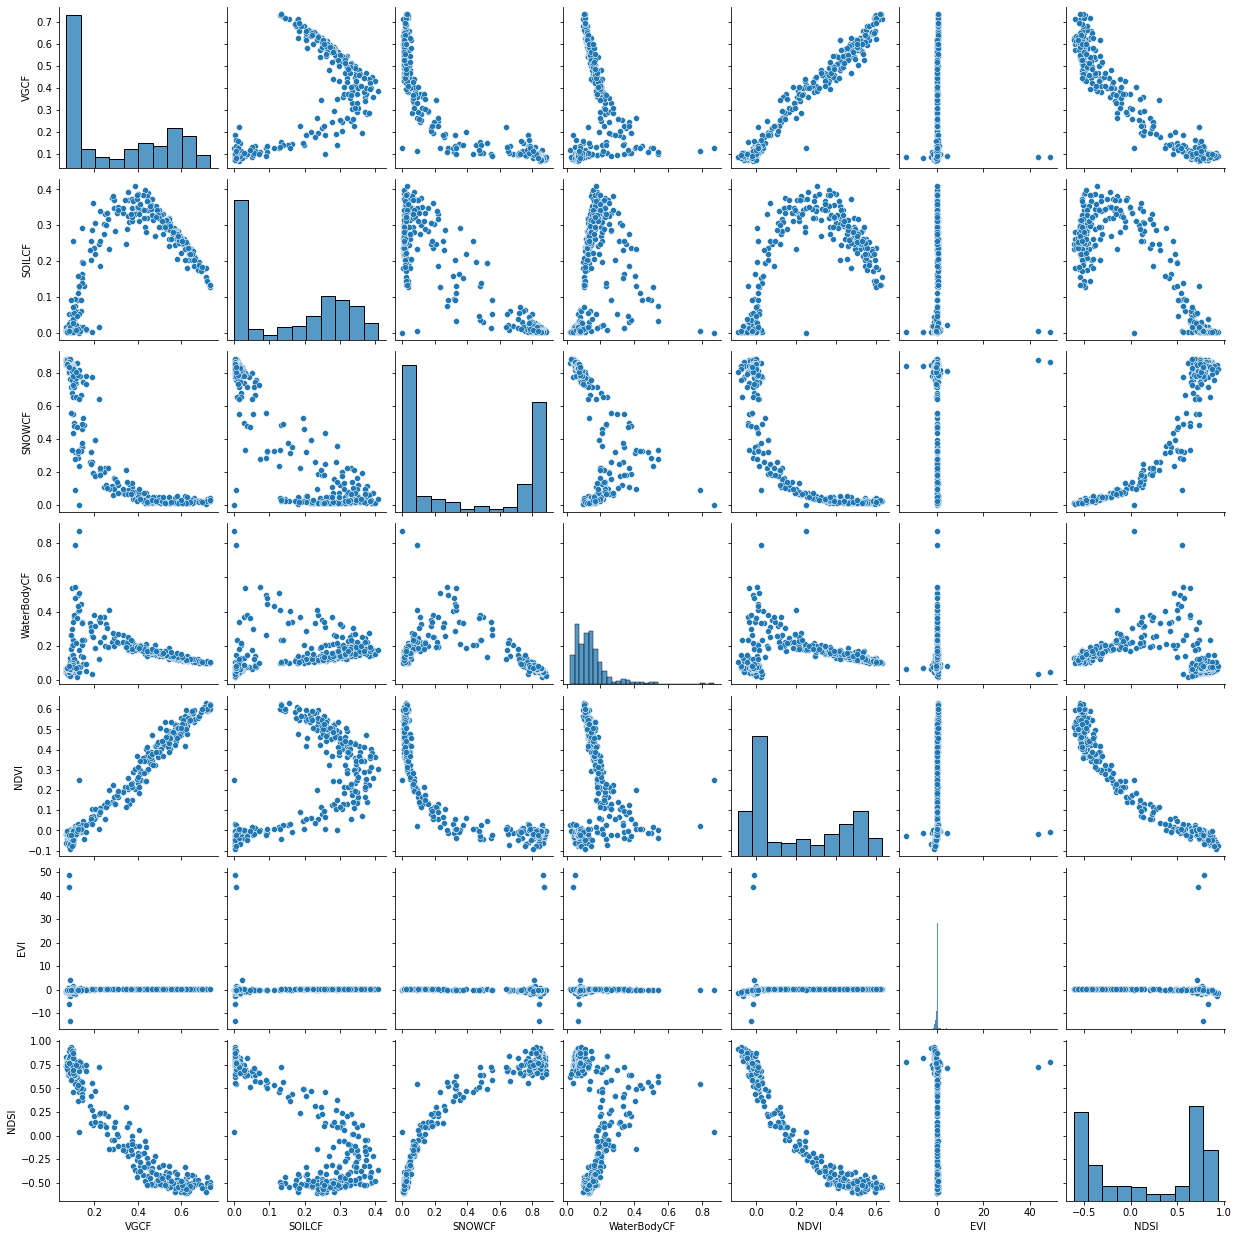

In [26]:
sns.pairplot(df)

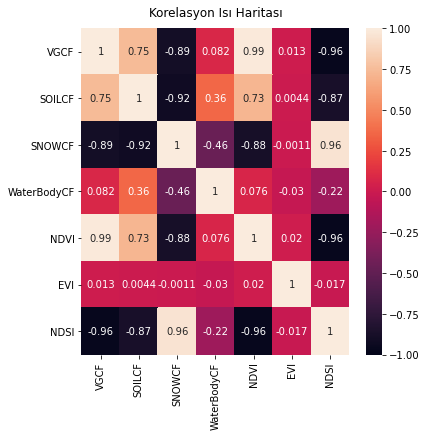

In [27]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Korelasyon Isı Haritası', fontdict={'fontsize':12}, pad=12);

#### Yapılacaklar
1. Veri setinde NaN değer olup olmadığını sorgulayınız.

2. İstikşafi veri analizi ve korelasyon matrisini inceleyiniz. Aralarında lineer bir ilişki olduğunu düşündüğünüz iki faktörün birini bağımlı ve birini bağımsız değişken olarak seçiniz.

3. Veri setinin %80'ini eğitim, %20'sini test verisi olacak şekilde bir lineer regresyon modeli inşa ediniz.

4. Veri setindeki bu iki faktöre ait değerleri ve oluşturduğunuz lineer regresyon doğrusunu aynı grafikte gösteriniz.

5. Oluşturduğunuz lineer regresyon modelinin kesen ve eğim değerlerini hesaplayınız. Doğru denklemini yazdırınız.

6. Oluşturduğunuz lineer regresyon modelinin R-kare, MAE ve MSE performans ölçütlerini hesaplayınız. 

7. Bağımsız değişken olarak seçtiğiniz faktör için belirlediğiniz bir değerin, model kestiriminde bağımlı değişkende hangi değere karşılık geldiğini hesaplayınız.